In [1]:
''' per far vedere il metodo per il calcolo del coefficiente di correlazione'''

from SnnBnnNSA              import *
from tkinter.simpledialog   import askinteger

def correlation_coefficient_misc(trial, snn_fs, rec_time, cc_type = 'binary signal'):
    
    # calculate two types of correlation coefficient (restitusce anche i valori con una maggiore freq di campionamento cosi che si vedano meglio
    snn_sim_time_samples = snn_fs*rec_time
    results=[]
    
    if cc_type == 'binary signal':
        bin_time = 0.2                # in secondi
        nbin = int(rec_time/bin_time) 
        bin_samples = snn_fs*bin_time # in samples
        binary_sig = []
        for neuron in trial:
            peak_train = np.zeros(snn_sim_time_samples)
            bins_value = np.unique([int(spike/bin_samples) for spike in neuron])
            for ibin in bins_value:
                if ibin>0:
                    peak_train[int(ibin*bin_samples):int((ibin+1)*bin_samples)] = 0.6      
            binary_sig.append([peak_train, bins_value])
        neurons = [i[1] for i in binary_sig]

        for i in range(len(neurons)-1):
            for j in range(i+1,len(neurons)):
                x = neurons[i]
                y = neurons[j]
                Nx = len(x)
                Ny = len(y)

                if (math.sqrt(Nx*(nbin-Nx))*math.sqrt(Ny*(nbin-Ny))) == 0:
                    if (nbin*len(np.where(np.in1d(x,y))[0])-Nx*Ny)>0:
                        r_xy = 1
                    else:
                        r_xy = -1
                else:
                    r_xy = (nbin*len(np.where(np.in1d(x,y))[0])-Nx*Ny)/(math.sqrt(Nx*(nbin-Nx))*math.sqrt(Ny*(nbin-Ny)))                    
                results.append([r_xy, i, j])
        return results, [i[0] for i in binary_sig]
    else:
        return

rec_time = askinteger(" ", "Recording time (in seconds):") # in seconds

'''SNN'''
snn_nneurons = 1024
snn_fs = 1000                           # Hz [samples/s]
snn_sim_time_samples = rec_time*snn_fs  # in samples
snn_fdir = './Thesis Data/snn'
snn_category = 'new-CONFIG1-SNN1'                    # SNN data to analyse: "old" "new"
snn_data = [np.loadtxt(os.path.join(snn_fdir,fname), skiprows=1, delimiter=';') for fname in os.listdir(snn_fdir) if os.path.isfile(os.path.join(snn_fdir,fname)) and snn_category in fname]
snn_timestamps = [preprocessing_snn(trial, snn_nneurons, snn_sim_time_samples) for trial in snn_data]

snn_CC_values = [correlation_coefficient_misc(trial, snn_fs, rec_time, 'binary signal') for trial in snn_timestamps]

trial = snn_timestamps[0]
trial1 = snn_CC_values[0][1]


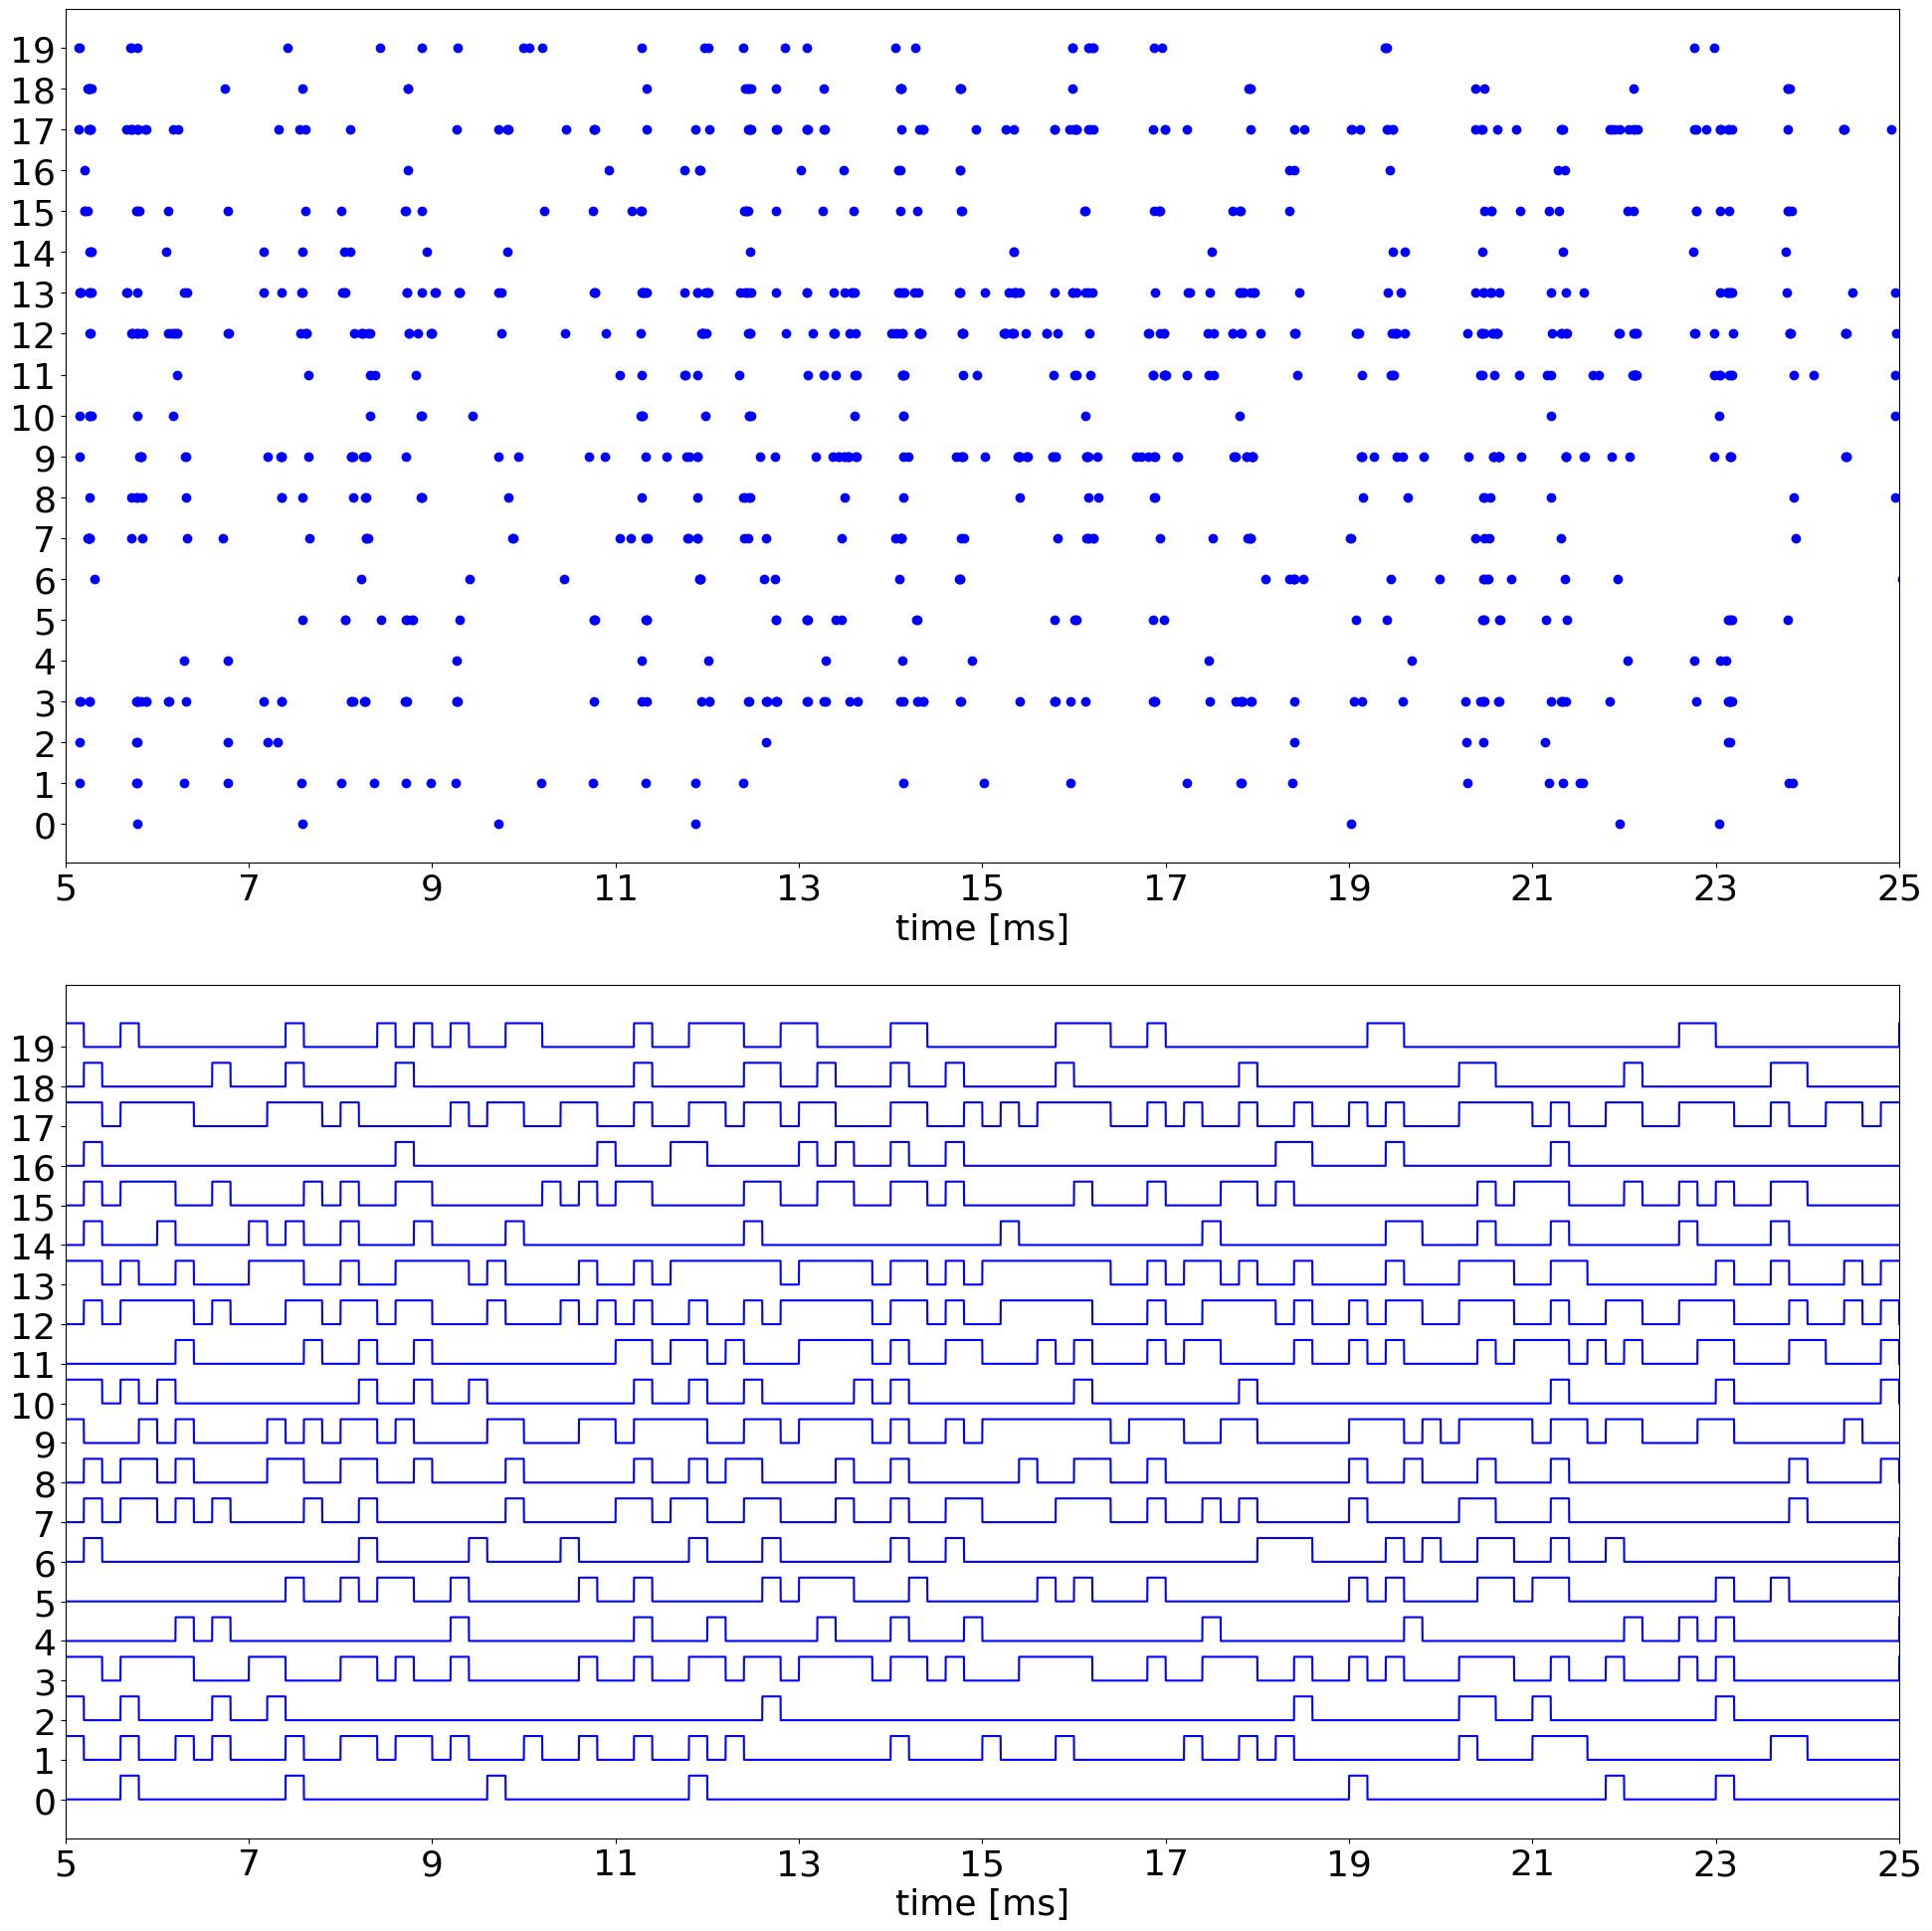

In [7]:

fig, ax = plt.subplots(2, layout = 'tight', figsize = (20,20))
start = 5000
end = 25000
for i in range(20):
    ax[0].scatter((trial[i])/1000,i*np.ones(len(trial[i])),color ='b')
    ax[0].set_xlim([start/1000,end/1000])
    ax[0].set_xticks(np.arange(int(start)/1000,int(end+1)/1000,2))
    ax[0].set_yticks(np.arange(int(0),int(20)))
    #ax[0].set_xticklabels(np.arange(int(start/1000),int((end+1)/1000),2))
    ax[0].set_xlabel('time [ms]')

    ax[1].plot(trial1[i]+i, 'b')
    ax[1].set_xlim([start,end])
    ax[1].set_xticks(np.arange(int(start),int(end+1),2000))
    ax[1].set_yticks(np.arange(int(0),int(20)))
    ax[1].set_xticklabels(np.arange(int(start/1000),int((end+1000)/1000),2))
    ax[1].set_xlabel('time [ms]')

In [ ]:
'''calcola cross correlazione e plotta (ci dovrebbe essere anche un altro codice che plotta i cross-correlogram)'''

# ''' da rivedere sotto(anche frequenza e tempo) per inserire in spike analysis e burst analysis'''
# def cross_correlation(neurons, sim_time):

#     '''calculate cross-correlation'''
#     bin_width = 2              # in ms (and samples)(should be 0.1 ms but the sample frequency is 1000Hz so it's not possible => 2 so that is at least bigger than the time resolution)
#     oneSide_window_width = 100 # in ms (and samples)(should be odd to have a bin in the middle)
#     window = 2*oneSide_window_width + bin_width
#     nbins = round(window/bin_width)
#     all_neurons_crosscorrelograms = []
#     for x in neurons:
#         single_neuron_crosscorrelograms = []
#         for y in neurons:

#             Cxy = np.zeros(nbins)
#             for xSpike in x:
#                 if xSpike > oneSide_window_width and xSpike < (sim_time - oneSide_window_width - 1):
#                     for bin in range(nbins):
#                         idx_inf = (xSpike-oneSide_window_width-bin_width/2)+bin*bin_width
#                         idx_sup = (xSpike-oneSide_window_width-bin_width/2)+(bin+1)*bin_width
#                         sup_lim = np.where(y < idx_sup)[0]
#                         both_lim = np.where(y[sup_lim] >= idx_inf)[0]
#                         Cxy[bin] += len(both_lim)

#             nCxy = Cxy/math.sqrt(len(x)*len(y))
#             single_neuron_crosscorrelograms.append(nCxy)
#         all_neurons_crosscorrelograms.append(single_neuron_crosscorrelograms)
#     return all_neurons_crosscorrelograms

# def plot_cross_correlogram(all_neurons_crosscorrelograms):

#     '''plot cross-correlograms'''
#     for xneuron in all_neurons_crosscorrelograms:

#         fig = plt.figure()
#         ax = fig.add_subplot(projection='3d')
#         yticks = range(len(xneuron))
#         for k in yticks:
#             # Generate the random data for the y=k 'layer'.
#             xs = np.ceil(np.arange(len(xneuron[k]))-len(xneuron[k])/2)
#             ys = xneuron[k]
#             ks = k*np.ones(len(xneuron[k]))
#             ax.plot3D(xs, ks, ys)
#         ax.set_xlabel('Time [bin]')
#         ax.set_ylabel('#neuron')
#         ax.set_zlabel('C(tau)')
#         # On the y-axis let's only label the discrete values that we have data for.
#         ax.set_yticks(yticks)
#         plt.show()

#     return
# ''' da rivedere sopra'''